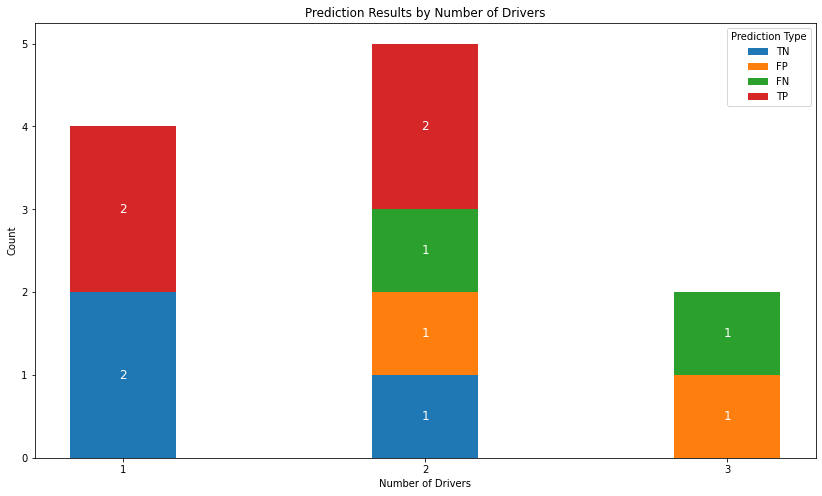

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample DataFrame
data = {
    'Y_true': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'Y_Pred': [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],
    'n_drivers': [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3]
}
df = pd.DataFrame(data)

# Function to calculate confusion matrix components
def confusion_components(group):
    tn, fp, fn, tp = confusion_matrix(group['Y_true'], group['Y_Pred'], labels=[0, 1]).ravel()
    return pd.Series({'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})

# Group by 'n_drivers' and calculate confusion matrix components for each group
confusion_df = df.groupby('n_drivers').apply(confusion_components).reset_index()

# Plotting with Matplotlib
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(confusion_df['n_drivers']))

# Stacked bars
bottom_values = np.zeros(len(confusion_df['n_drivers']))
for type_label in ['TN', 'FP', 'FN', 'TP']:
    values = confusion_df[type_label].values
    bars = plt.bar(bar_positions, values, bottom=bottom_values, label=type_label, width=bar_width)
    bottom_values += values
    
    # Annotate bars with counts
    for bar, count in zip(bars, values):
        if count > 0:  # Only annotate if the count is greater than 0
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                     int(count), ha='center', va='center', color='white', fontsize=12)

# Adding labels and title
plt.xlabel('Number of Drivers')
plt.ylabel('Count')
plt.title('Prediction Results by Number of Drivers')
plt.xticks(bar_positions, confusion_df['n_drivers'])
plt.legend(title='Prediction Type')

# Display the plot
plt.show()


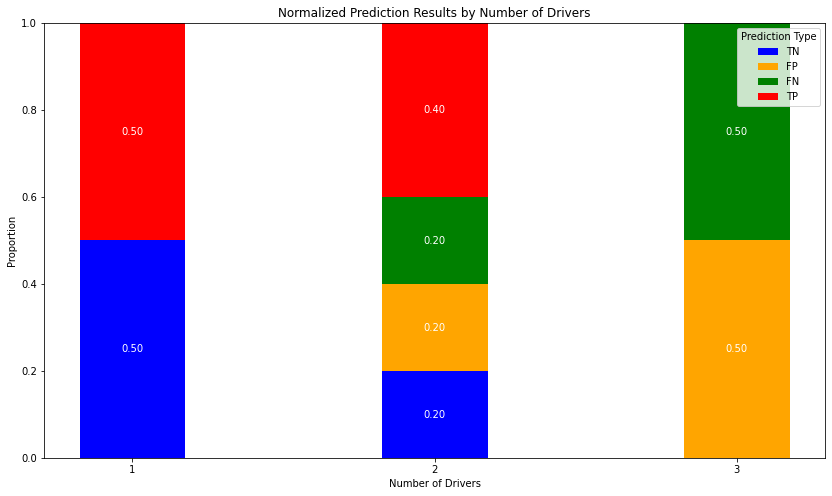

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sample DataFrame
data = {
    'Y_true': [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
    'Y_Pred': [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0],
    'n_drivers': [1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3]
}
df = pd.DataFrame(data)

# Function to calculate confusion matrix components
def confusion_components(group):
    tn, fp, fn, tp = confusion_matrix(group['Y_true'], group['Y_Pred'], labels=[0, 1]).ravel()
    return pd.Series({'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp})

# Group by 'n_drivers' and calculate confusion matrix components for each group
confusion_df = df.groupby('n_drivers').apply(confusion_components).reset_index()

# Normalize the values within each n_drivers group
confusion_df[['TN', 'FP', 'FN', 'TP']] = confusion_df[['TN', 'FP', 'FN', 'TP']].div(confusion_df[['TN', 'FP', 'FN', 'TP']].sum(axis=1), axis=0)

# Plotting with Matplotlib
plt.figure(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(confusion_df['n_drivers']))

# Stacked bars
bottom_values = np.zeros(len(confusion_df['n_drivers']))
colors = ['blue', 'orange', 'green', 'red']
for i, type_label in enumerate(['TN', 'FP', 'FN', 'TP']):
    values = confusion_df[type_label].values
    bars = plt.bar(bar_positions, values, bottom=bottom_values, label=type_label, width=bar_width, color=colors[i])
    bottom_values += values
    
    # Annotate bars with counts
    for bar, count in zip(bars, values):
        if count > 0:  # Only annotate if the count is greater than 0
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
                     f'{count:.2f}', ha='center', va='center', color='white', fontsize=10)

# Adding labels and title
plt.xlabel('Number of Drivers')
plt.ylabel('Proportion')
plt.title('Normalized Prediction Results by Number of Drivers')
plt.xticks(bar_positions, confusion_df['n_drivers'])
plt.legend(title='Prediction Type')

# Display the plot
plt.show()
